C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_1888\2129871868.py:39: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  device_time = datetime.utcfromtimestamp(record["device_t"])
C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_1888\2129871868.py:39: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  device_time = datetime.utcfromtimestamp(record["device_t"])
C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_1888\2129871868.py:39: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetim

KeyboardInterrupt: 

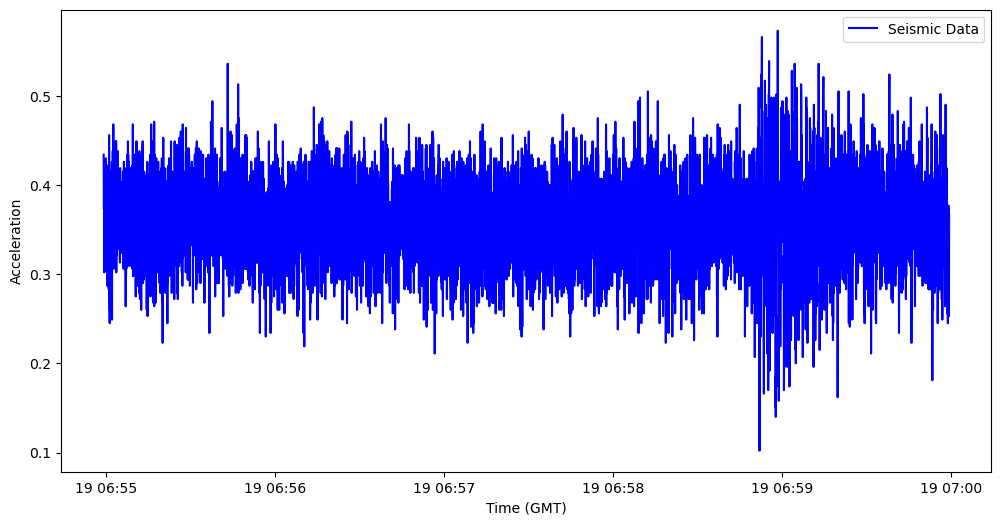

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from obspy.signal.trigger import classic_sta_lta

# Load predictions CSV
predictions_csv = "predictions_neww_updated.csv"
predictions_df = pd.read_csv(predictions_csv)
predictions_df["Threshold Time"] = pd.to_datetime(predictions_df["Threshold Time"], format="%H:%M:%S.%f")

# Define input and output directories
input_root = "AWS EARTHQUAKE DATASET"
output_root = "output_plot_pred_updated"

# Traverse dataset
for date_folder in os.listdir(input_root):
    date_path = os.path.join(input_root, date_folder)
    if not os.path.isdir(date_path):  
        continue  
    
    for device_folder in os.listdir(date_path):
        device_path = os.path.join(date_path, device_folder)
        if not os.path.isdir(device_path):
            continue  
        
        for json_file in os.listdir(device_path):
            if not json_file.endswith(".jsonl"):
                continue  
            
            file_path = os.path.join(device_path, json_file)
            x_data, time_data = [], []
            
            with open(file_path, "r") as file:
                for line in file:
                    record = json.loads(line)
                    device_time = datetime.utcfromtimestamp(record["device_t"])
                    sr = record["sr"]
                    
                    duration = len(record["x"]) / sr
                    time_values = [device_time - timedelta(seconds=(duration - i / sr)) for i in range(len(record["x"]))]
                    x_data.extend(record["x"])
                    time_data.extend(time_values)

            x_data = np.array(x_data)
            time_data = np.array(time_data)
            
            # Compute STA/LTA
            sta_window = int(1 * sr)
            lta_window = int(10 * sr)
            sta_lta_x = classic_sta_lta(x_data, sta_window, lta_window)
            
            # Filter predictions for current file
            file_predictions = predictions_df[(predictions_df["Date"] == date_folder) &
                                              (predictions_df["Device ID"] == device_folder) &
                                              (predictions_df["File"] == json_file)]
            
            # Plot
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(time_data, x_data, color='blue', label='Seismic Data')
            
            # Plot predicted events
            for _, row in file_predictions.iterrows():
                pred_time = row["Threshold Time"]
                pred_label = row["Predicted Label"]
                color = 'red' if pred_label == 1 else 'black'
                ax.axvline(pred_time, color=color, linestyle='-', linewidth=1.5, label=f'Prediction {pred_label}')
            
            ax.set_xlabel("Time (GMT)")
            ax.set_ylabel("Acceleration")
            ax.legend()
            
            # Save plot
            output_dir = os.path.join(output_root, date_folder, device_folder)
            os.makedirs(output_dir, exist_ok=True)
            output_file = os.path.join(output_dir, f"{json_file}.png")
            plt.savefig(output_file)
            plt.close()

print("Plots with predictions saved successfully!")


seprate below old version

C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_1888\1835659292.py:57: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT
C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_1888\1835659292.py:57: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT
C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_1888\1835659292.py:57: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to

KeyboardInterrupt: 

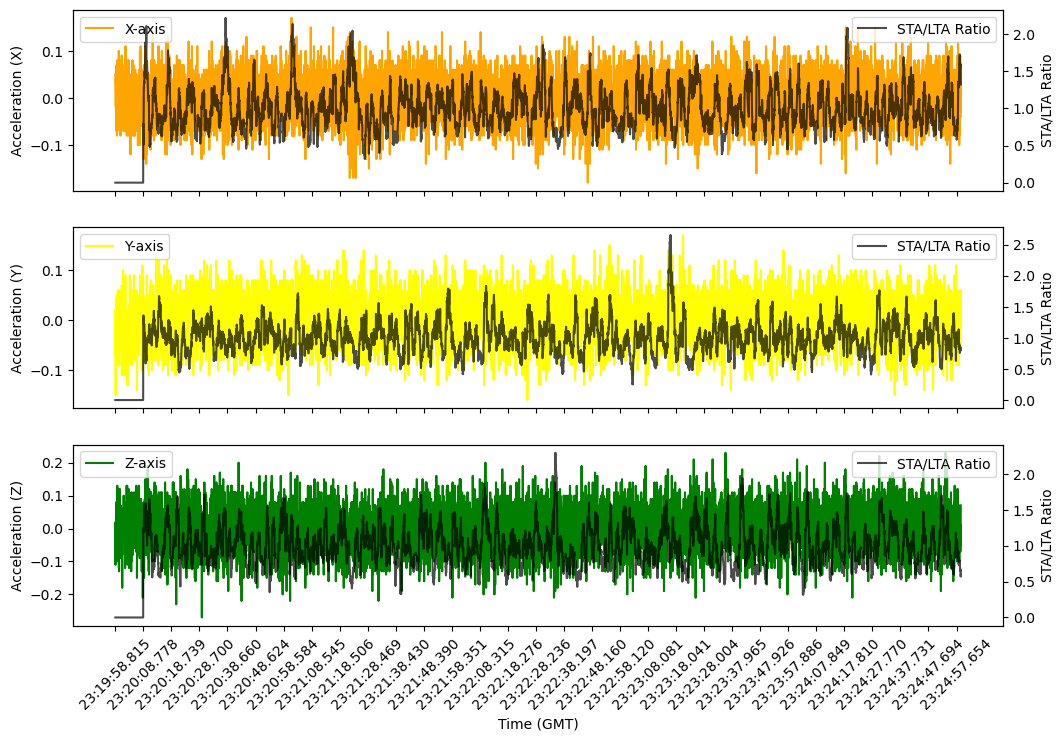

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from obspy.signal.trigger import classic_sta_lta

# Define input and output directories
input_root = "AWS EARTHQUAKE DATASET"
output_root = "output plot save"
predictions_csv = "predictions_neww_updated.csv"

# Load predictions CSV
df_predictions = pd.read_csv(predictions_csv)

# Convert CSV timestamps to match JSON time format
df_predictions["Threshold Time"] = df_predictions["Threshold Time"].astype(str)
formatted_times = []

for t in df_predictions["Threshold Time"]:
    try:
        # Convert MM:SS.sss to HH:MM:SS.sss
        formatted_time = datetime.strptime(t, "%M:%S.%f").strftime("%H:%M:%S.%f")[:-3]
        formatted_times.append(formatted_time)
    except ValueError:
        formatted_times.append(None)

df_predictions["Formatted Time"] = formatted_times

# Traverse all subdirectories
for date_folder in os.listdir(input_root):
    date_path = os.path.join(input_root, date_folder)
    
    if not os.path.isdir(date_path):  
        continue  # Skip if not a directory
    
    for device_folder in os.listdir(date_path):
        device_path = os.path.join(date_path, device_folder)

        if not os.path.isdir(device_path):
            continue  # Skip if not a directory
        
        for json_file in os.listdir(device_path):
            if not json_file.endswith(".jsonl"):
                continue  # Process only JSONL files
            
            file_path = os.path.join(device_path, json_file)
            
            # Initialize lists for data and timestamps
            x_data, y_data, z_data, time_data = [], [], [], []

            # Read and process JSONL file
            with open(file_path, "r") as file:
                for line in file:
                    record = json.loads(line)
                    device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT
                    sr = record["sr"]  # Sampling rate

                    # Generate time values
                    duration = len(record["x"]) / sr
                    time_values = [(device_time - timedelta(seconds=(duration - i / sr))).strftime('%H:%M:%S.%f')[:-3]
                                   for i in range(len(record["x"]))]

                    x_data.extend(record["x"])
                    y_data.extend(record["y"])
                    z_data.extend(record["z"])
                    time_data.extend(time_values)

            # Convert to numpy arrays
            x_data, y_data, z_data, time_data = map(np.array, [x_data, y_data, z_data, time_data])

            # Compute STA/LTA ratios
            sta_window = int(1 * sr)  # Short-term window
            lta_window = int(10 * sr)  # Long-term window

            sta_lta_x = classic_sta_lta(x_data, sta_window, lta_window)
            sta_lta_y = classic_sta_lta(y_data, sta_window, lta_window)
            sta_lta_z = classic_sta_lta(z_data, sta_window, lta_window)

            # Reduce x-axis label density
            step = int(sr * 10)  
            time_labels = time_data[::step]
            indices = np.arange(len(time_data))[::step]

            # Create subplots for x, y, and z axes
            fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

            def plot_accel_with_sta_lta(ax, data, sta_lta, color, label):
                ax.plot(time_data, data, color=color, label=f"{label}-axis")
                ax.set_ylabel(f"Acceleration ({label})")
                ax.legend(loc="upper left")

                ax2 = ax.twinx()
                ax2.plot(time_data, sta_lta, color='black', alpha=0.7, linestyle="-", label="STA/LTA Ratio")
                ax2.set_ylabel("STA/LTA Ratio")
                ax2.legend(loc="upper right")

            # Plot acceleration and STA/LTA
            plot_accel_with_sta_lta(axes[0], x_data, sta_lta_x, 'orange', "X")
            plot_accel_with_sta_lta(axes[1], y_data, sta_lta_y, 'yellow', "Y")
            plot_accel_with_sta_lta(axes[2], z_data, sta_lta_z, 'green', "Z")
            axes[2].set_xlabel("Time (GMT)")
            axes[2].set_xticks(indices)
            axes[2].set_xticklabels(time_labels, rotation=45)

            # Match predictions with timestamps
            matching_predictions = df_predictions[
                (df_predictions["Date"] == date_folder) &
                (df_predictions["Device ID"] == device_folder) &
                (df_predictions["File"] == json_file)
            ]

            for _, row in matching_predictions.iterrows():
                csv_time = row["Formatted Time"]
                if csv_time in time_data:
                    idx = np.where(time_data == csv_time)[0][0]
                    color = 'red' if row["Predicted Label"] == 1 else 'black'
                    for ax in axes:
                        ax.axvline(x=time_data[idx], color=color, linestyle='-', linewidth=1.5)

            plt.tight_layout()

            # Define output path
            output_dir = os.path.join(output_root, date_folder, device_folder)
            os.makedirs(output_dir, exist_ok=True)
            output_file = os.path.join(output_dir, f"{json_file}.png")

            # Save plot
            plt.savefig(output_file)
            plt.close()

print("Processing and saving completed!")


C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_17632\1071343199.py:46: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT
C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_17632\1071343199.py:46: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT
C:\Users\Ayush_trainee\AppData\Local\Temp\ipykernel_17632\1071343199.py:46: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects

KeyboardInterrupt: 

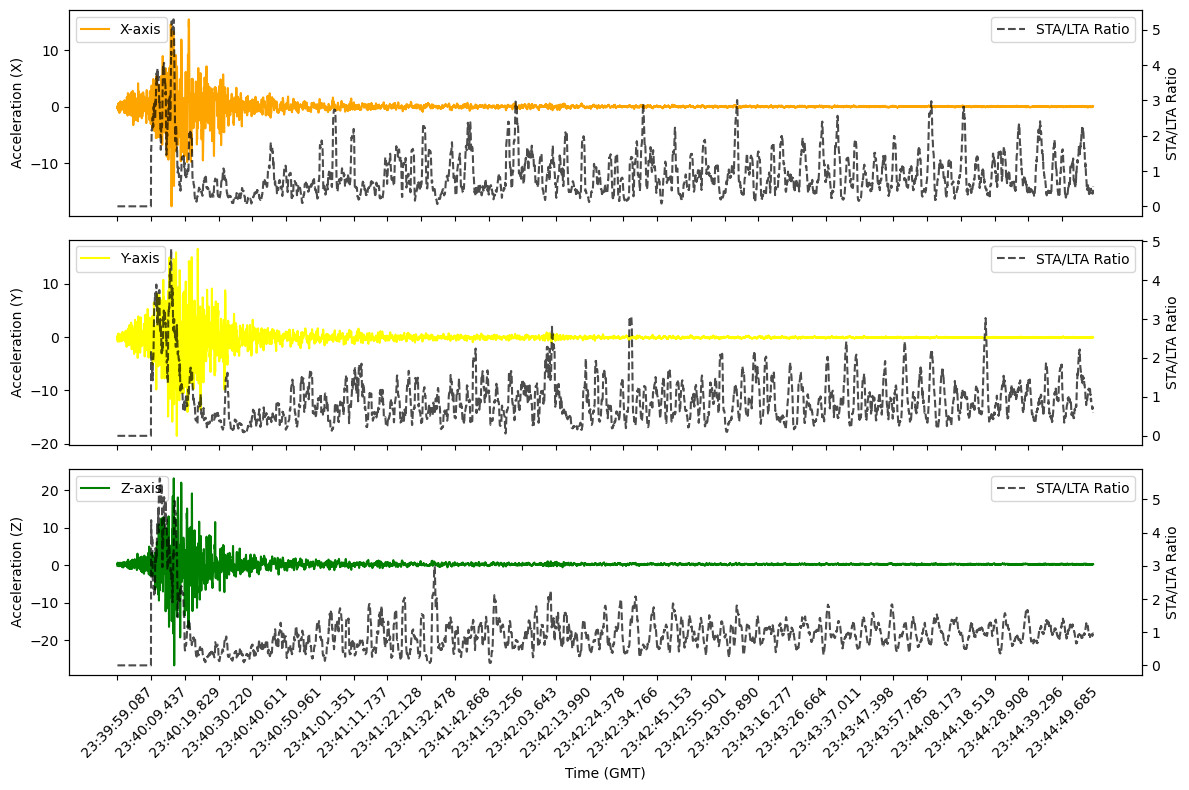

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from obspy.signal.trigger import classic_sta_lta

# Define input and output directories
input_root = "AWS EARTHQUAKE DATASET"
output_root = "output_plot_predictions"
predictions_csv = "predictions_neww.csv"

# Load predictions CSV
df_predictions = pd.read_csv(predictions_csv)

# Convert the threshold time column to datetime
df_predictions["Threshold Time"] = pd.to_datetime(df_predictions["Threshold Time"])

# Traverse all subdirectories
for date_folder in os.listdir(input_root):
    date_path = os.path.join(input_root, date_folder)
    
    if not os.path.isdir(date_path):  
        continue  # Skip if not a directory
    
    for device_folder in os.listdir(date_path):
        device_path = os.path.join(date_path, device_folder)

        if not os.path.isdir(device_path):
            continue  # Skip if not a directory
        
        for json_file in os.listdir(device_path):
            if not json_file.endswith(".jsonl"):
                continue  # Process only JSONL files
            
            file_path = os.path.join(device_path, json_file)
            
            # Initialize lists for data and timestamps
            x_data, y_data, z_data, time_data = [], [], [], []

            # Read and process JSONL file
            with open(file_path, "r") as file:
                for line in file:
                    record = json.loads(line)
                    device_time = datetime.utcfromtimestamp(record["device_t"])  # Convert to GMT
                    sr = record["sr"]  # Sampling rate

                    # Generate time values
                    duration = len(record["x"]) / sr
                    time_values = [(device_time - timedelta(seconds=(duration - i / sr))).strftime('%H:%M:%S.%f')[:-3]
                                   for i in range(len(record["x"]))]

                    x_data.extend(record["x"])
                    y_data.extend(record["y"])
                    z_data.extend(record["z"])
                    time_data.extend(time_values)

            # Convert to numpy arrays
            x_data, y_data, z_data, time_data = map(np.array, [x_data, y_data, z_data, time_data])

            # Compute STA/LTA ratios
            sta_window = int(1 * sr)  # Short-term window
            lta_window = int(10 * sr)  # Long-term window

            sta_lta_x = classic_sta_lta(x_data, sta_window, lta_window)
            sta_lta_y = classic_sta_lta(y_data, sta_window, lta_window)
            sta_lta_z = classic_sta_lta(z_data, sta_window, lta_window)

            # Reduce x-axis label density
            step = int(sr * 10)  
            time_labels = time_data[::step]
            indices = np.arange(len(time_data))[::step]

            # Create subplots for x, y, and z axes
            fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

            def plot_accel_with_sta_lta(ax, data, sta_lta, color, label):
                ax.plot(time_data, data, color=color, label=f"{label}-axis")
                ax.set_ylabel(f"Acceleration ({label})")
                ax.legend(loc="upper left")

                ax2 = ax.twinx()
                ax2.plot(time_data, sta_lta, color='black', alpha=0.7, linestyle="--", label="STA/LTA Ratio")
                ax2.set_ylabel("STA/LTA Ratio")
                ax2.legend(loc="upper right")

            # Plot acceleration and STA/LTA
            plot_accel_with_sta_lta(axes[0], x_data, sta_lta_x, 'orange', "X")
            plot_accel_with_sta_lta(axes[1], y_data, sta_lta_y, 'yellow', "Y")
            plot_accel_with_sta_lta(axes[2], z_data, sta_lta_z, 'green', "Z")

            axes[2].set_xlabel("Time (GMT)")
            axes[2].set_xticks(indices)
            axes[2].set_xticklabels(time_labels, rotation=45)

            # Overlay vertical lines from predictions
            matching_predictions = df_predictions[
                (df_predictions["Date"] == date_folder) & 
                (df_predictions["Device ID"] == device_folder) & 
                (df_predictions["File"] == json_file)
            ]

            for _, row in matching_predictions.iterrows():
                threshold_time = row["Threshold Time"].strftime('%H:%M:%S.%f')[:-3]
                color = 'red' if row["Predicted Label"] == 1 else 'black'

                if threshold_time in time_data:
                    idx = np.where(time_data == threshold_time)[0][0]
                    for ax in axes:
                        ax.axvline(x=time_data[idx], color=color, linestyle='-', linewidth=1.5)  # Solid line


            plt.tight_layout()

            # Define output path
            output_dir = os.path.join(output_root, date_folder, device_folder)
            os.makedirs(output_dir, exist_ok=True)
            output_file = os.path.join(output_dir, f"{json_file}.png")

            # Save plot
            plt.savefig(output_file)
            plt.close()

print("Processing and saving completed!")
